# **[Python for Data Science] Final Project 1: Linear Regression**
# **Hacktiv8**

# **Pengenalan**
Halo! Kami dari Kelompok 8, yang beranggotakan:
- Alpian Khairi
- Aziz Fatih Fauzi
- Fikri Fahreza

Kami berharap dari Final Project ini bisa menghasilkan *feedback* atau komentar tentang analisis dan model yang telah kami buat.


# Uber and Lyft Dataset Boston

## 1. Information About Dataset

Dataset yang digunakan yaitu Uber and Lyft Dataset Boston, MA yang berisi record data perjalanan taksi uber dan lyft di Boston, MA. Dataset ini terdiri dari 57 kolom dan 693.071 data. Dataset diperoleh dari kaggle dengan link sebagai berikut https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma

Dataset ini mengandung banyak nilai NA dan outliers maka cocok untuk dilakukan data cleaning dan preprocessing. Selain itu, dataset ini juga terdiri dari banyak kolom (variabel) sehingga sangat cocok untuk membuat model regresi linier untuk melihat pola antara variabel-variabel yang berbeda, serta membuat suatu prediksi berdasarkan model regresi linier.

## 2. Data Preparation

In [79]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

pd.options.display.max_rows = None
pd.options.display.max_columns = None


In [80]:
# open data
df = pd.read_csv('rideshare_kaggle.csv',skiprows=[203720])
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693069 entries, 0 to 693068
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693069 non-null  object 
 1   timestamp                    693069 non-null  float64
 2   hour                         693069 non-null  int64  
 3   day                          693069 non-null  int64  
 4   month                        693069 non-null  int64  
 5   datetime                     693069 non-null  object 
 6   timezone                     693069 non-null  object 
 7   source                       693069 non-null  object 
 8   destination                  693069 non-null  object 
 9   cab_type                     693069 non-null  object 
 10  product_id                   693069 non-null  object 
 11  name                         693069 non-null  object 
 12  price                        637974 non-null  float64
 13 

In [82]:
df.shape

(693069, 57)

In [83]:
df.columns.values

array(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'short_summary',
       'long_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime',
       'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperat

In [84]:
df.index.values

array([     0,      1,      2, ..., 693066, 693067, 693068], dtype=int64)

In [85]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930690e+05,693069.000000,693069.000000,693069.000000,637974.000000,693069.000000,693069.000000,693069.000000,693069.000000,693069.000000,693069.000000,693069.000000,693069.000000,693069.000000,693069.000000,693069.000000,6.930690e+05,693069.000000,693069.000000,6.930690e+05,693069.000000,6.930690e+05,693069.000000,6.930690e+05,693069.000000,6.930690e+05,693069.000000,693069.000000,693069.000000,693069.000000,693069.000000,693069.000000,693069.000000,6.930690e+05,6.930690e+05,693069.000000,693069.000000,6.930690e+05,693069.000000,6.930690e+05,693069.000000,6.930690e+05,693069.000000,6.930690e+05,693069.000000,6.930690e+05
mean,1.544046e+09,11.619143,17.794348,11.586685,16.545132,2.189430,1.013870,42.338172,-71.066151,39.584411,35.881261,0.008922,0.146076,0.741119,6.186237,8.469828,1.544049e+09,8.467966,45.041000,1.544050e+09,34.150762,1.544102e+09,41.614086,1.544050e+09,30.139852,1.544099e+09,31.656292,1010.094783,220.055593,0.686502,0.248909,8.467966,313.513503,1.544027e+09,1.544060e+09,0.579066,0.037375,1.544044e+09,33.457787,1.544042e+09,45.261324,1.544047e+09,29.731025,1.544048e+09,41.997363,1.544048e+09
std,6.891919e+05,6.948121,9.982291,0.492429,9.324370,1.138938,0.091641,0.047840,0.020302,6.726070,7.918668,0.026901,0.328939,0.138595,3.148212,5.289142,6.928239e+05,2.602891,5.996532,6.937915e+05,6.383150,6.922917e+05,7.666114,6.941693e+05,8.057456,6.927373e+05,9.142327,13.472913,99.102761,0.358535,0.474097,2.602891,27.952983,6.911387e+05,6.906628e+05,0.244705,0.055214,6.912022e+05,6.467221,6.901948e+05,5.645047,6.901349e+05,7.110471,6.871857e+05,6.936839,6.910772e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [86]:
df.describe(include = object)

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,693069,693069,693069,693069,693069,693069,693069,693069,693069,693069,693069
unique,693069,31350,1,12,12,2,13,13,9,11,7
top,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-11-26 23:21:14,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,156,693069,58857,58851,385661,55096,55096,218895,202339,218895


In [87]:
# Cek kolom yang termasuk categorical
print('Nama Kolom')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Nama Kolom
id 693069
datetime 31350
timezone 1
source 12
destination 12
cab_type 2
product_id 13
name 13
short_summary 9
long_summary 11
icon 7


## 3. Data Cleansing

In [88]:
# Cek Missing Value
print(df.isnull().sum())

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Terdapat missing value pada kolom price sebanyak 55.095. Mengingat bahwa kolom price adalah kolom target dan jumlah observasi pada data cukup banyak, maka missing values akan dibuang.

In [89]:
df = df.dropna().reset_index()

In [90]:
df.isnull().sum()

index                          0
id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatur

In [91]:
df.shape

(637974, 58)

In [92]:
# cek duplikasi data
df.duplicated().any()

False

In [93]:
# jumlah duplikasi data
df.duplicated().sum()

0

Selanjutnya beberapa kolom yang tidak diperlukan akan dibuang, hal ini juga berguna untuk menyederhanakan model ketika akan memprediksi dan mengurangi eror ketika memprediksi.

In [94]:
df =  df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'
                 ,'latitude','longitude','product_id','timezone', 'index'],axis = 1)
df.shape

(637974, 38)

## 4. Explorasi Data Analysis (EDA)

### a. Time Ananlysis


**Data Month**

In [95]:
!pip install -U kaleido

In [96]:
def plot_bar(groupby_column):
    df1 = df.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame=df1, x=groupby_column, y="counts", color=groupby_column, barmode="group")
    print(df1)
    fig1.show(renderer='png')

   month  counts
0     11  263770
1     12  374204


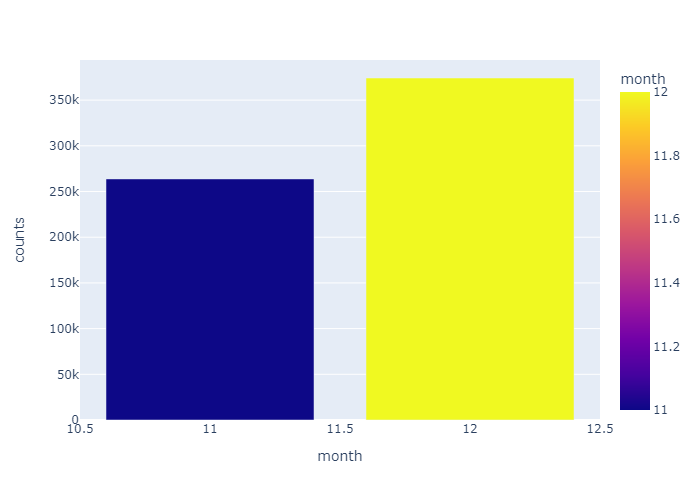

In [97]:
plot_bar('month')

Hanya terdapat bulan November dan Desember, itu artinya data hanya direkam atau diambil pada bulan november dan desember dengan dominasi data desember

**Data Day**

    day  counts
0     1   41680
1     2   41298
2     3   41323
3     4   11627
4     9    1529
5    10    2534
6    13   35496
7    14   41344
8    15   41332
9    16   41359
10   17   41354
11   18   33328
12   26   29028
13   27   70135
14   28   67842
15   29   55221
16   30   41544


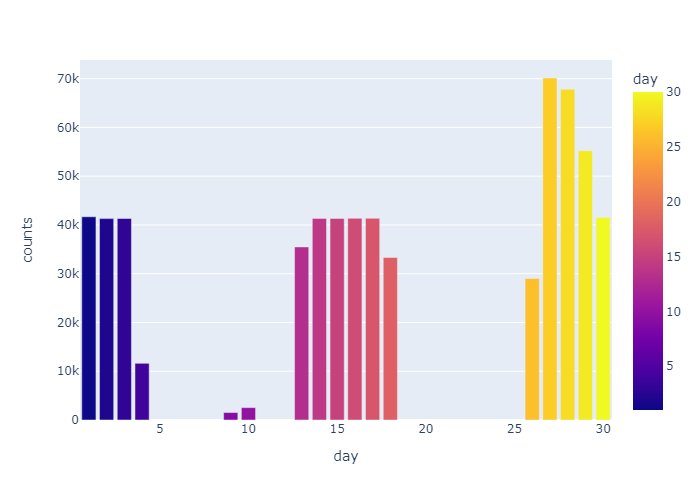

In [98]:
plot_bar('day')

Terlihat datanya memiliki banyak gap dalam data 'day'. Misalnya kita tidak memiliki data dari tanggal 18 sampai hari ke 25 setiap bulannya.

**Data Hours**

    hour  counts
0      0   29872
1      1   26310
2      2   26323
3      3   25530
4      4   26125
5      5   22995
6      6   25146
7      7   22930
8      8   22337
9      9   26673
10    10   27918
11    11   27946
12    12   28017
13    13   27976
14    14   27976
15    15   27868
16    16   27972
17    17   28075
18    18   27958
19    19   25410
20    20   24620
21    21   25549
22    22   27093
23    23   29355


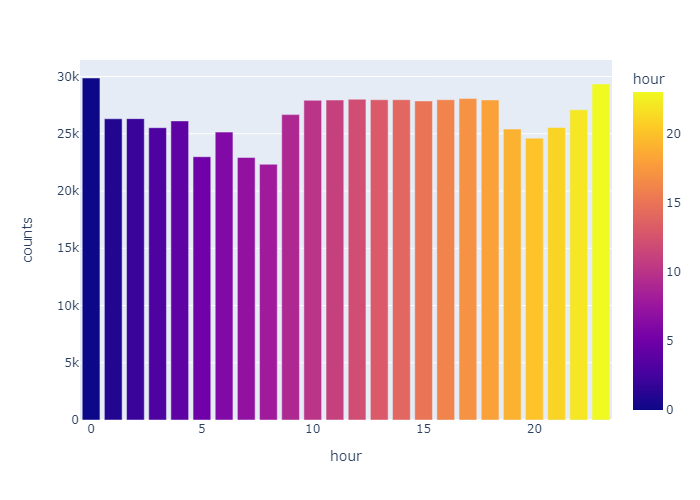

In [99]:
plot_bar('hour')

Terlihat data terekam hampir 24 jam

### b. Source & Destination Analysis

                     source  counts
0                  Back Bay   53201
1               Beacon Hill   52841
2         Boston University   53172
3                    Fenway   53166
4        Financial District   54197
5          Haymarket Square   53147
6                 North End   53169
7             North Station   52576
8   Northeastern University   53164
9             South Station   53160
10         Theatre District   53201
11                 West End   52980


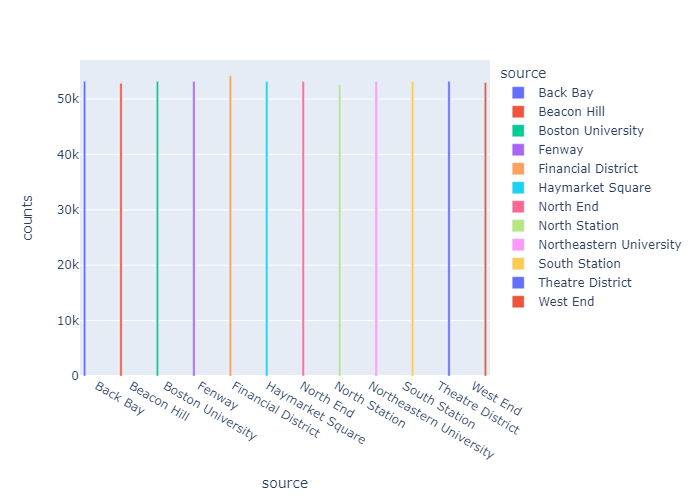

In [100]:
plot_bar('source')


Tampaknya semua source hampir sama jumlahnya. Ada sekitar 50 ribu data di setiap fitur source (Back Bay, Beacon Hill, Boston University, dll)

                destination  counts
0                  Back Bay   53190
1               Beacon Hill   52839
2         Boston University   53171
3                    Fenway   53166
4        Financial District   54192
5          Haymarket Square   53171
6                 North End   53164
7             North Station   52577
8   Northeastern University   53165
9             South Station   53159
10         Theatre District   53188
11                 West End   52992


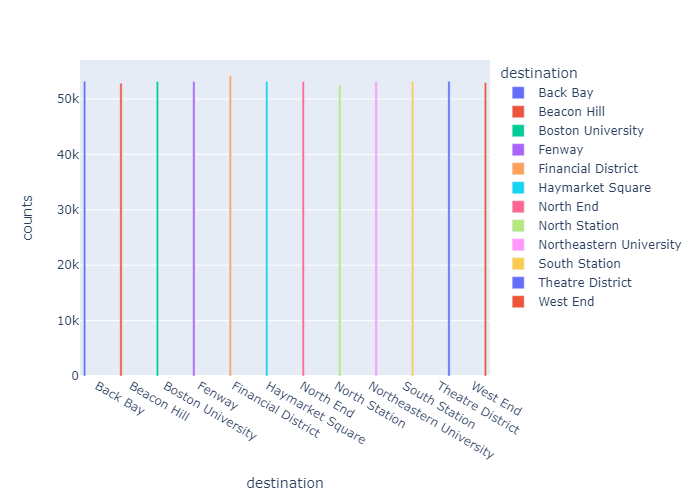

In [101]:
plot_bar('destination')


Sama dengan fitur source, ada sekitar 50 ribu data di setiap fitur destination (Back Bay, Beacon Hill, Boston University, dll)

### c. Cab Analysis

  cab_type  counts
0     Lyft  307408
1     Uber  330566


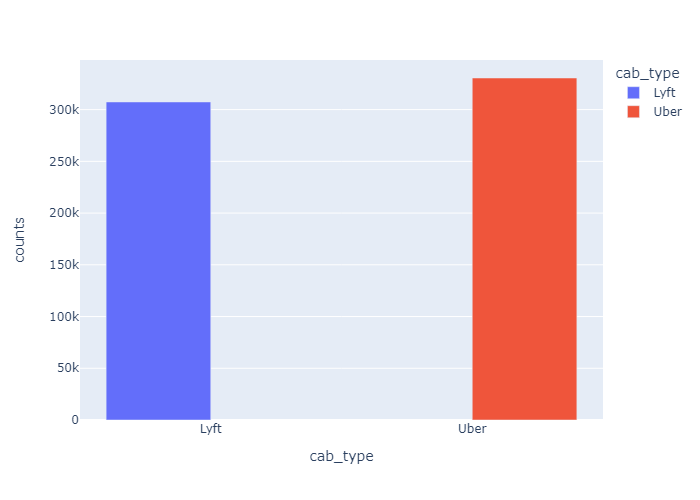

In [102]:
plot_bar('cab_type')

Jumlah uber lebih dari lyft. Perbedaannya tidak terlalu besar, setiap jenis taksi memiliki sekitar 300 ribu.

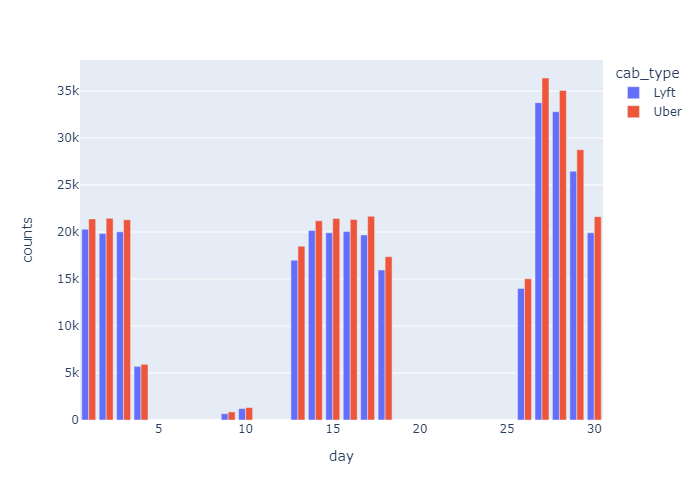

In [103]:
df2 = df.groupby(by=["day","cab_type"]).size().reset_index(name="counts")
fig2 = px.bar(data_frame=df2, x="day", y="counts", color="cab_type", barmode="group")
fig2.show(renderer='png')

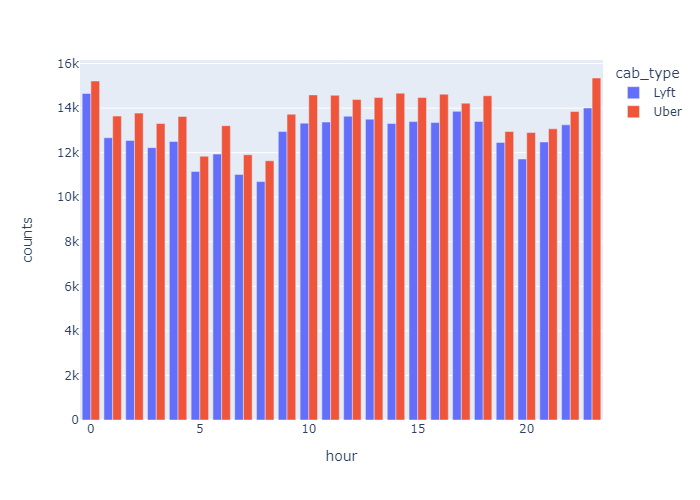

In [104]:
df3 = df.groupby(["hour","cab_type"]).size().reset_index(name="counts")
fig3 = px.bar(data_frame=df3, x="hour", y="counts", color="cab_type", barmode="group")
fig3.show(renderer='png')

Setiap hari dan setiap jam yang tercatat, **Uber** lebih mendominasi pemesanan dibanding dengan **Lyft**


### d. Price Analysis

In [105]:
# mean dari data price di setiap route (source-destination)
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.983223
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169026
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

In [106]:
# maximum data price
print('Maximum price :',df.price.max())
df[df['price']==df.price.max()]

Maximum price : 97.5


,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureHighTime,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
549669,1,2,12,Financial District,Fenway,Lyft,Lux Black XL,97.5,4.43,2.0,35.52,35.52,Clear,0.0,0.0,0.82,1.85,2.37,9.846,44.65,1543690800,34.88,43.98,35.53,clear-night,30.46,1023.52,146,0.12,0,9.846,274.6,0.82,0.0,31.57,44.65,28.1,43.98


#### Price Distribution

C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price'>

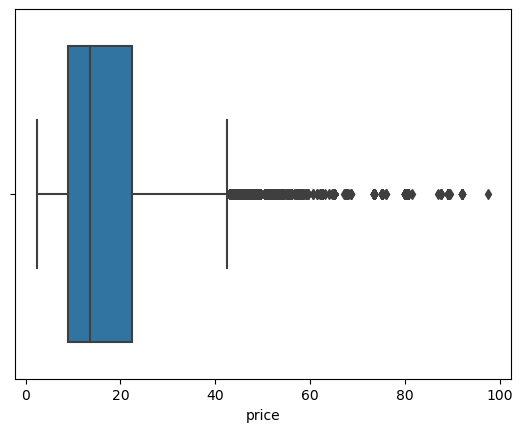

In [107]:
#Distribution of data price
sns.boxplot(df['price'])


Berdasarkan boxplot diatas, distribusi price cenderung mengarah ke **Positive Skew**. Dan terdapat nilai leverage. Selanjutnya akan dilakukan perbandingan apakah menghilangkan leverage akan berpengaruh baik atau buruk terhadap model.

Terlebih dahulu kita akan membuat sebuah dataframe baru tanpa leverage/outliers, untuk melihat pengaruhnya terhadap kebaikan model. Maka kita akan mencari terlebih dahulu tracehold bagi nilai price, untuk membuang nilai leverage yang ada.

In [108]:
max_threshold = df['price'].quantile(0.99)
max_threshold

42.5

In [109]:
df[df['price'] > max_threshold].shape

(5589, 38)

Ada 1.668 observasi yang nilai pricenya terdeteksi sebagai leverage.

In [110]:
df_no_outlier = df[df['price'] < max_threshold]
df_no_outlier.shape

(629992, 38)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price'>

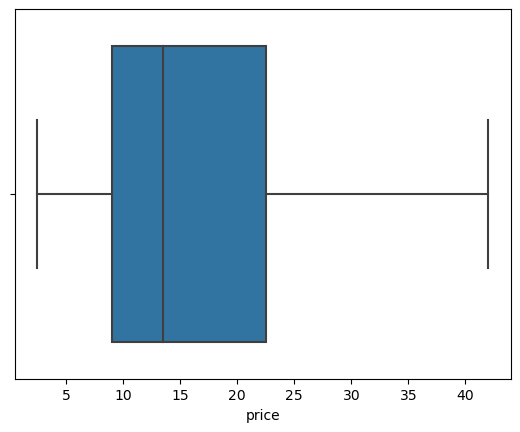

In [111]:
sns.boxplot(df_no_outlier['price'])

## 5. Data Preprocessing

### Cek korelasi antar variabel

In [112]:
temp_cols = ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']
df_temp = df[temp_cols]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


<AxesSubplot:>

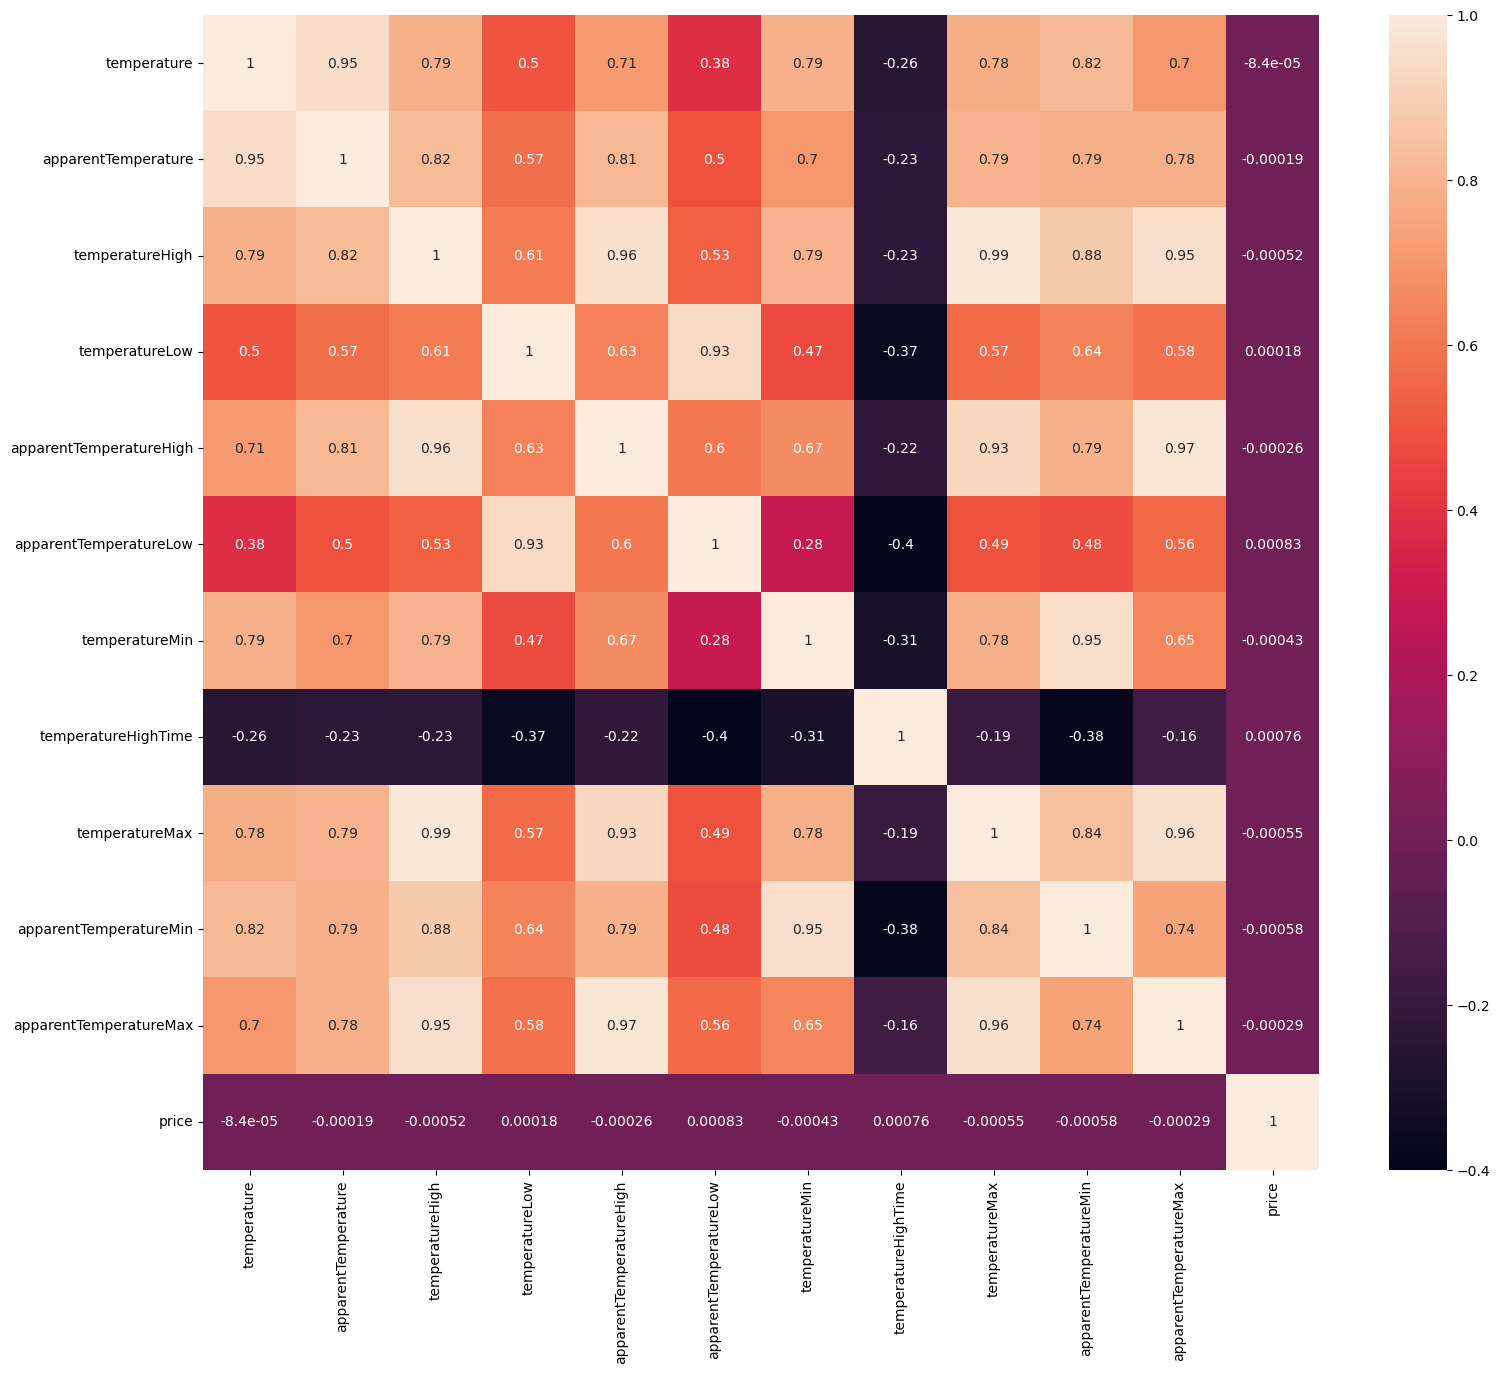

In [113]:
plt.figure(figsize=(18,15))
sns.heatmap(df_temp.corr(),annot=True)

Dapat terlihat bahwa korelasi antara kolom price dengan temperature sangat mendekati 0, yang artinya korelasi disini sangat kecil. Kita akan drop semua kolom temperature pada bagian selanjutnya.

In [114]:
df.drop(columns=['apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'], inplace=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637974 entries, 0 to 637973
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hour                637974 non-null  int64  
 1   day                 637974 non-null  int64  
 2   month               637974 non-null  int64  
 3   source              637974 non-null  object 
 4   destination         637974 non-null  object 
 5   cab_type            637974 non-null  object 
 6   name                637974 non-null  object 
 7   price               637974 non-null  float64
 8   distance            637974 non-null  float64
 9   surge_multiplier    637974 non-null  float64
 10  temperature         637974 non-null  float64
 11  short_summary       637974 non-null  object 
 12  precipIntensity     637974 non-null  float64
 13  precipProbability   637974 non-null  float64
 14  humidity            637974 non-null  float64
 15  windSpeed           637974 non-nul

Kita akan memeriksa *cardinality* dan *multicollinearity* feature pada data.

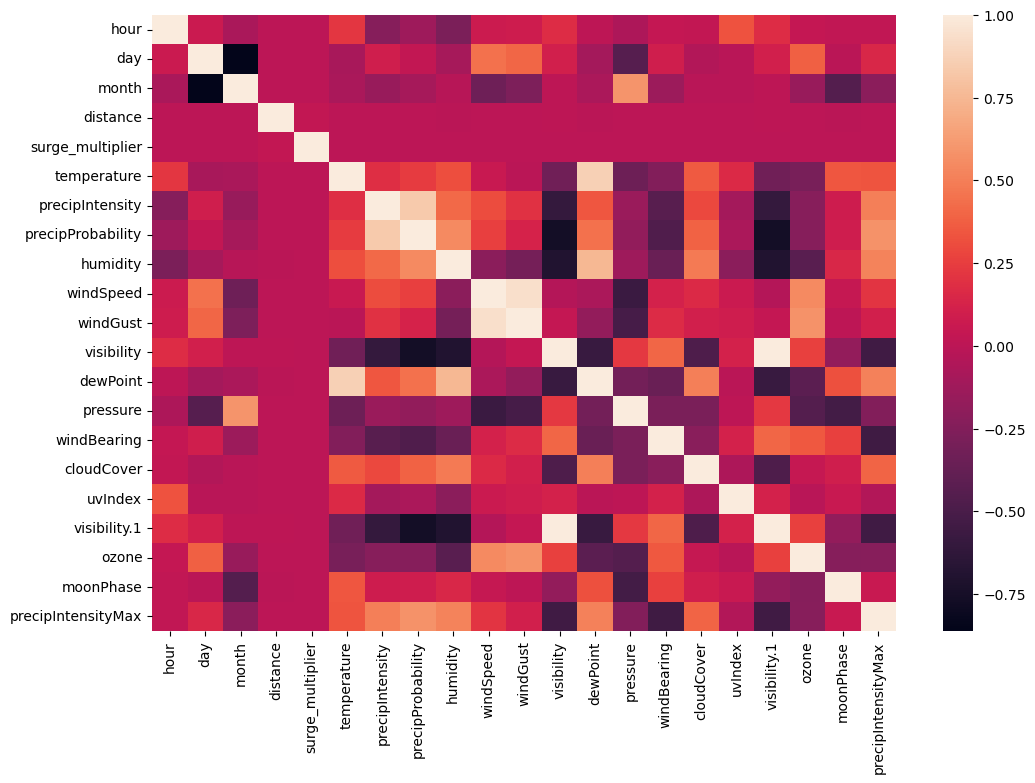

In [116]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns="price").corr());

<AxesSubplot:>

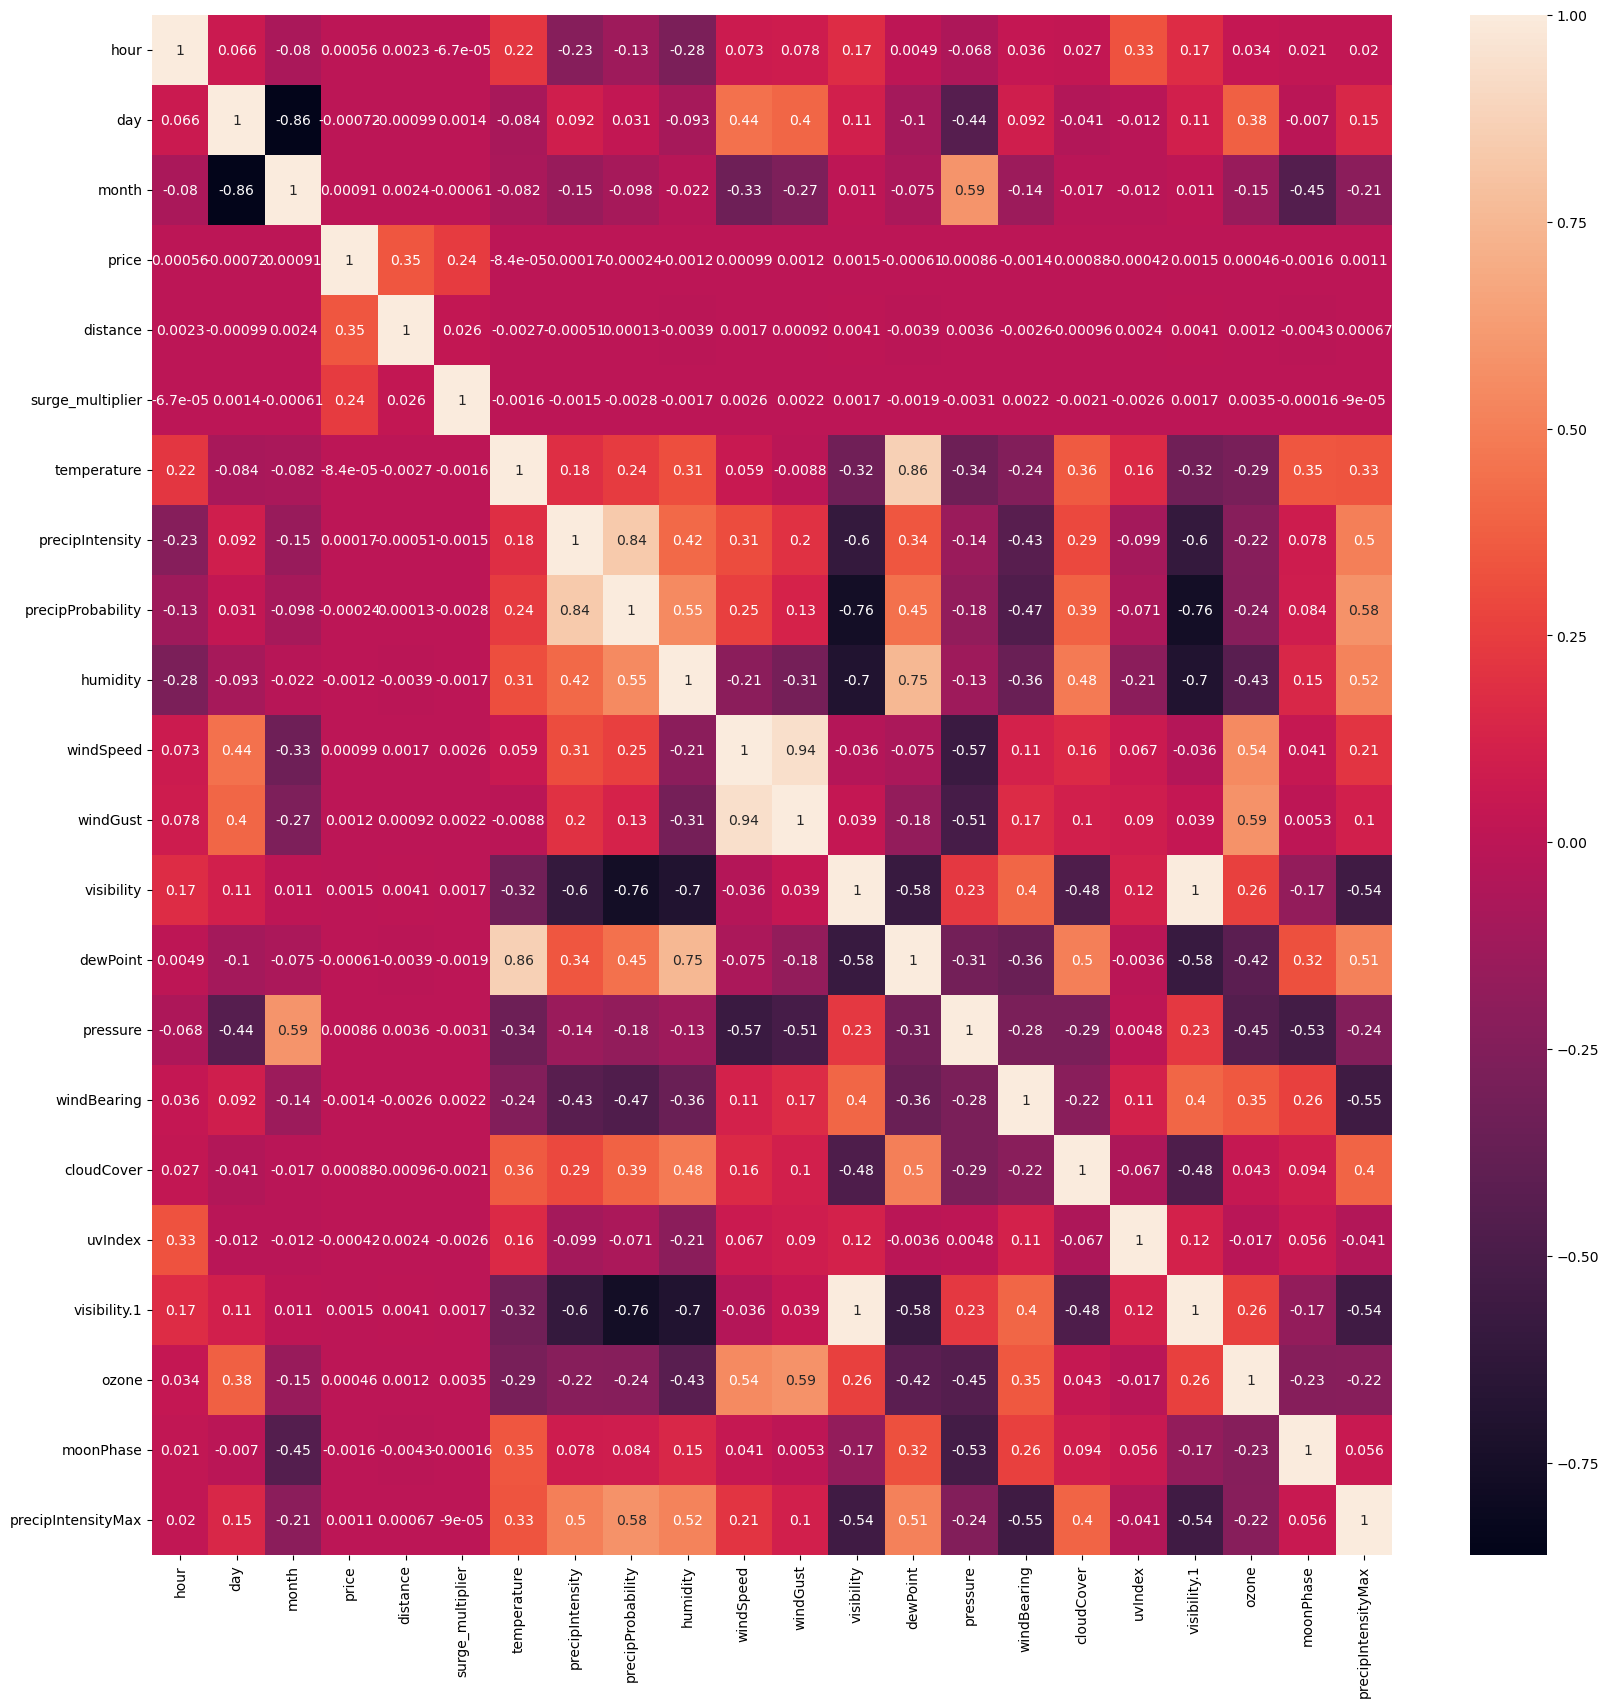

In [117]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

Dari visualisasi diatas dapat terlihat bahwa beberapa prediktor berkorelasi satu sama lain atau multicollinearity. Dan terdapat beberapa kolom yang tidak berkorelasi dengan target, sehingga akan dihapus juga.

In [118]:
cli_col = ['price','precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax']
data_cli = df[cli_col]
data_cli.head()

,price,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,5.0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,11.0,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,7.0,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,26.0,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,9.0,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


<AxesSubplot:>

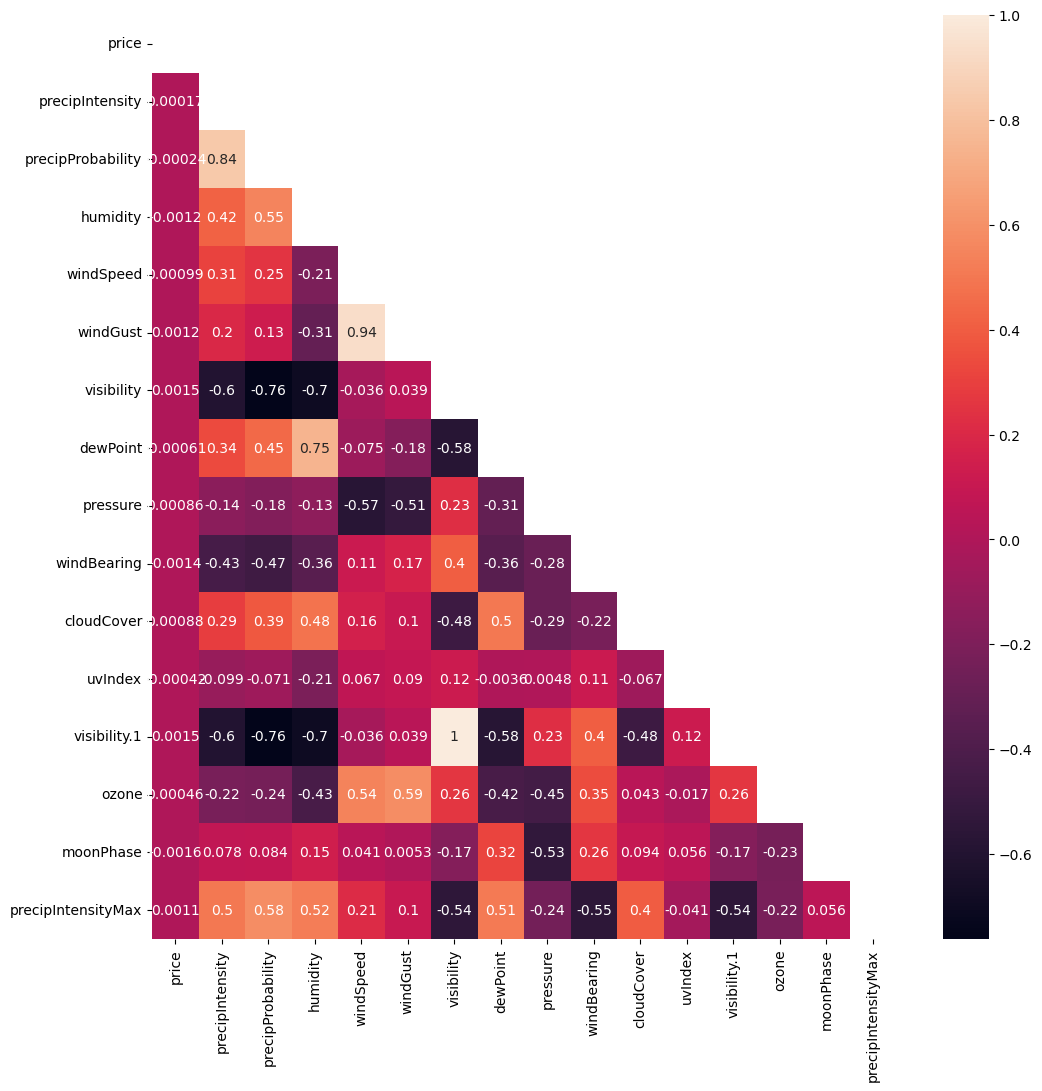

In [119]:
plt.figure(figsize=(12,12))
sns.heatmap(data_cli.corr(),annot=True, mask=np.triu(data_cli.corr()))

In [120]:
# drop data climate features
cli_col = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax']
df = df.drop(cli_col,axis=1)
df.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,Rain,rain
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,Clear,clear-night
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,Clear,clear-night
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,Partly Cloudy,partly-cloudy-night


<AxesSubplot:>

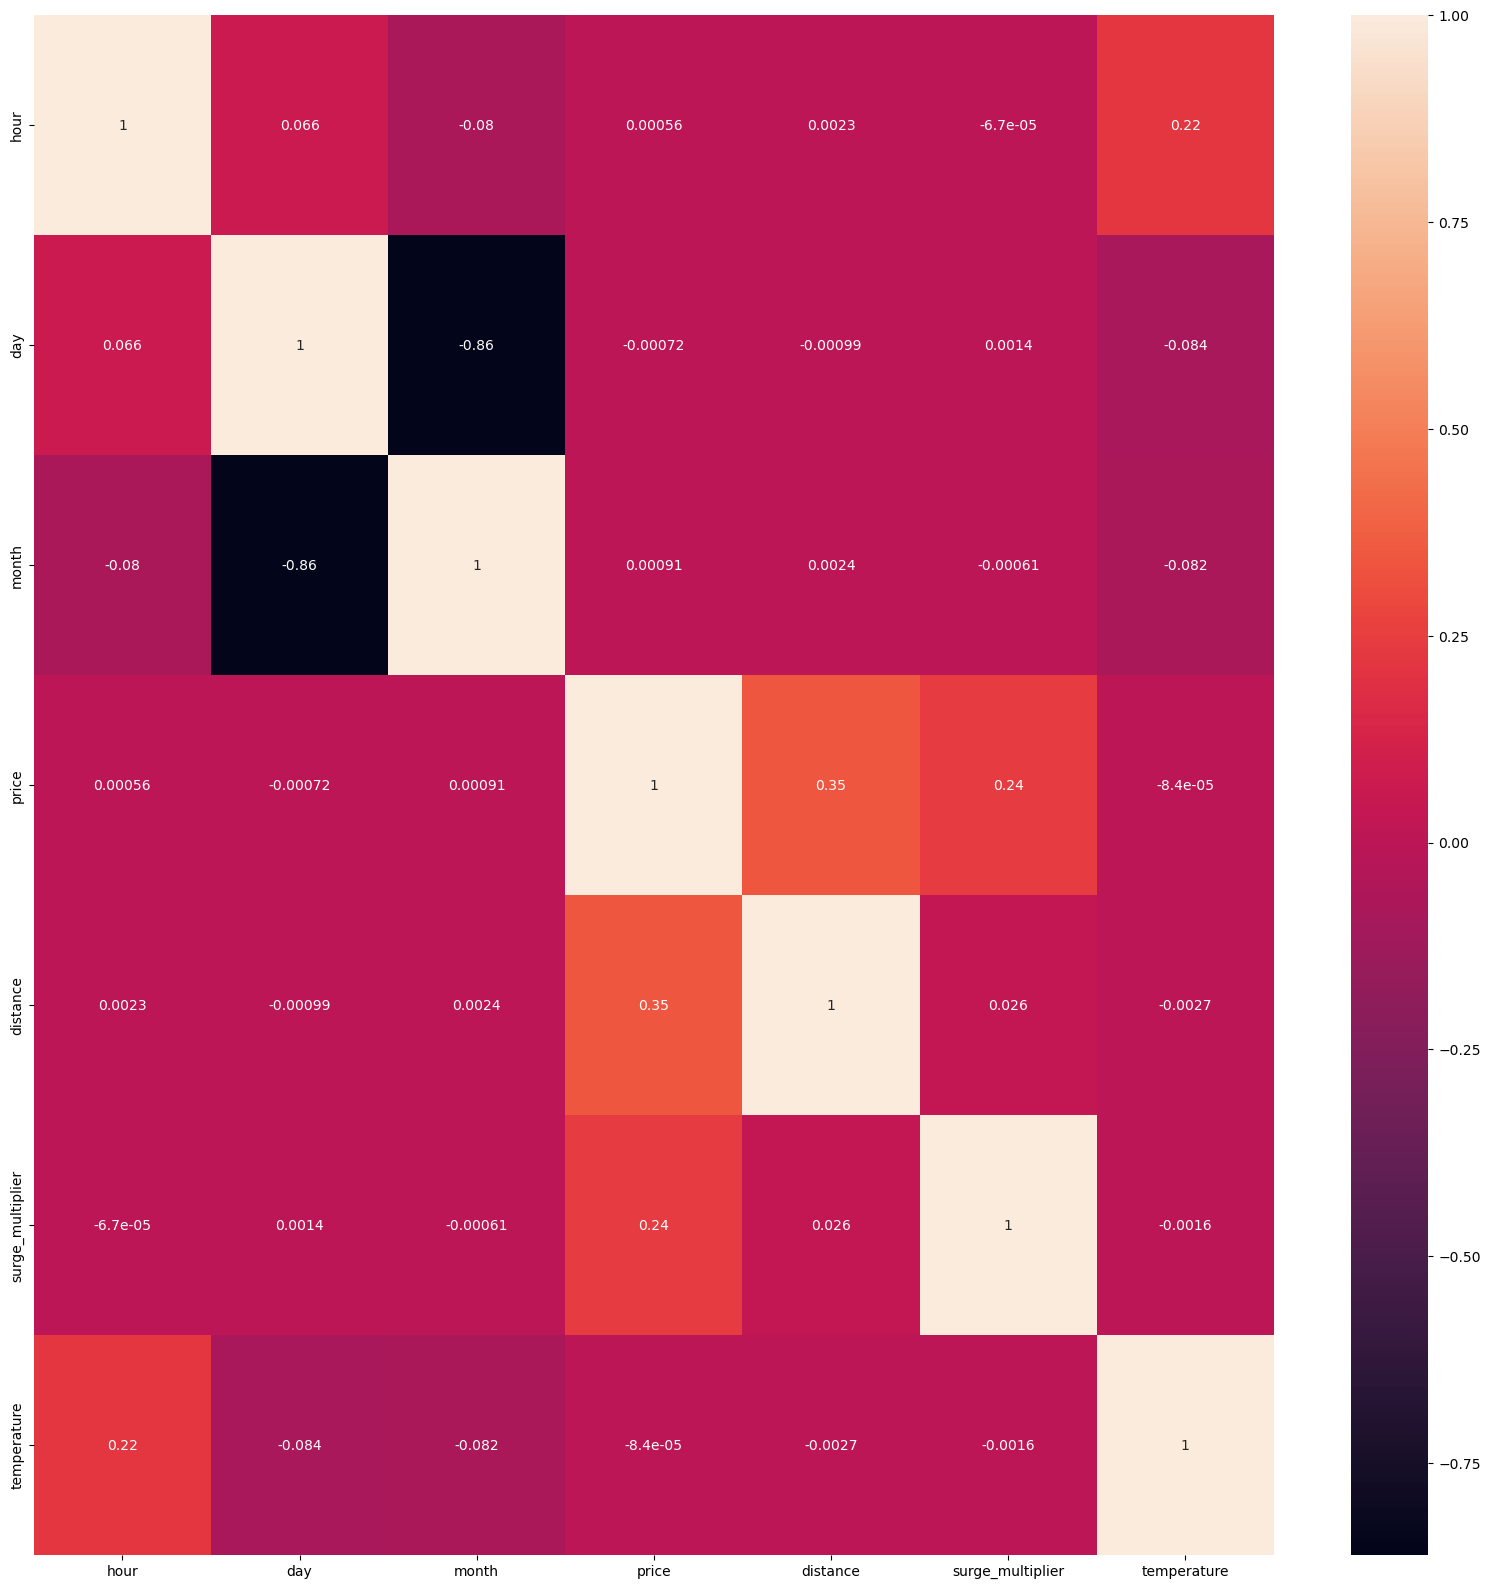

In [121]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

### Encoding Data

Sebelum memasuki tahapan pemodelan, maka data-data variabel yang berada dalam bentuk category harus diubah kedalam bentuk numerik agar proses pemodelan dapat dilakukan. Maka dari itu akan dilakukan proses encoding ini untuk melakukan transformasi nilai category menjadi numerik.

In [122]:
cat_col = df.select_dtypes(include=['object','category']).columns.tolist()
print(cat_col)

# menjalankan OneHotEncoder dan menggabungkan data frame original (data) dengan data frame hasil encoding (enc_df)
for col in cat_col:
    encoder = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray())
    enc_df.columns = encoder.get_feature_names([col])
    df = df.drop(col, axis=1)
    df = pd.concat([df, enc_df], axis=1)

['source', 'destination', 'cab_type', 'name', 'short_summary', 'icon']


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

C:\Users\User\Anaconda3\lib\

In [123]:
df.head()

,hour,day,month,price,distance,surge_multiplier,temperature,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,5.0,0.44,1.0,42.34,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,11.0,0.44,1.0,43.58,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,7.0,0.44,1.0,38.33,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,34.38,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,37.44,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Selanjutnya kita akan melihat pengaruh kolom hasil encoding terhadap price, apabila variabel-variabelnya tidak cukup berkorelasi maka akan dibuang.

In [124]:
 #membuat dataframe dengan variabel price dan source
src_col = ['price','source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay']
df_src = df[src_col]
df_src.head()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

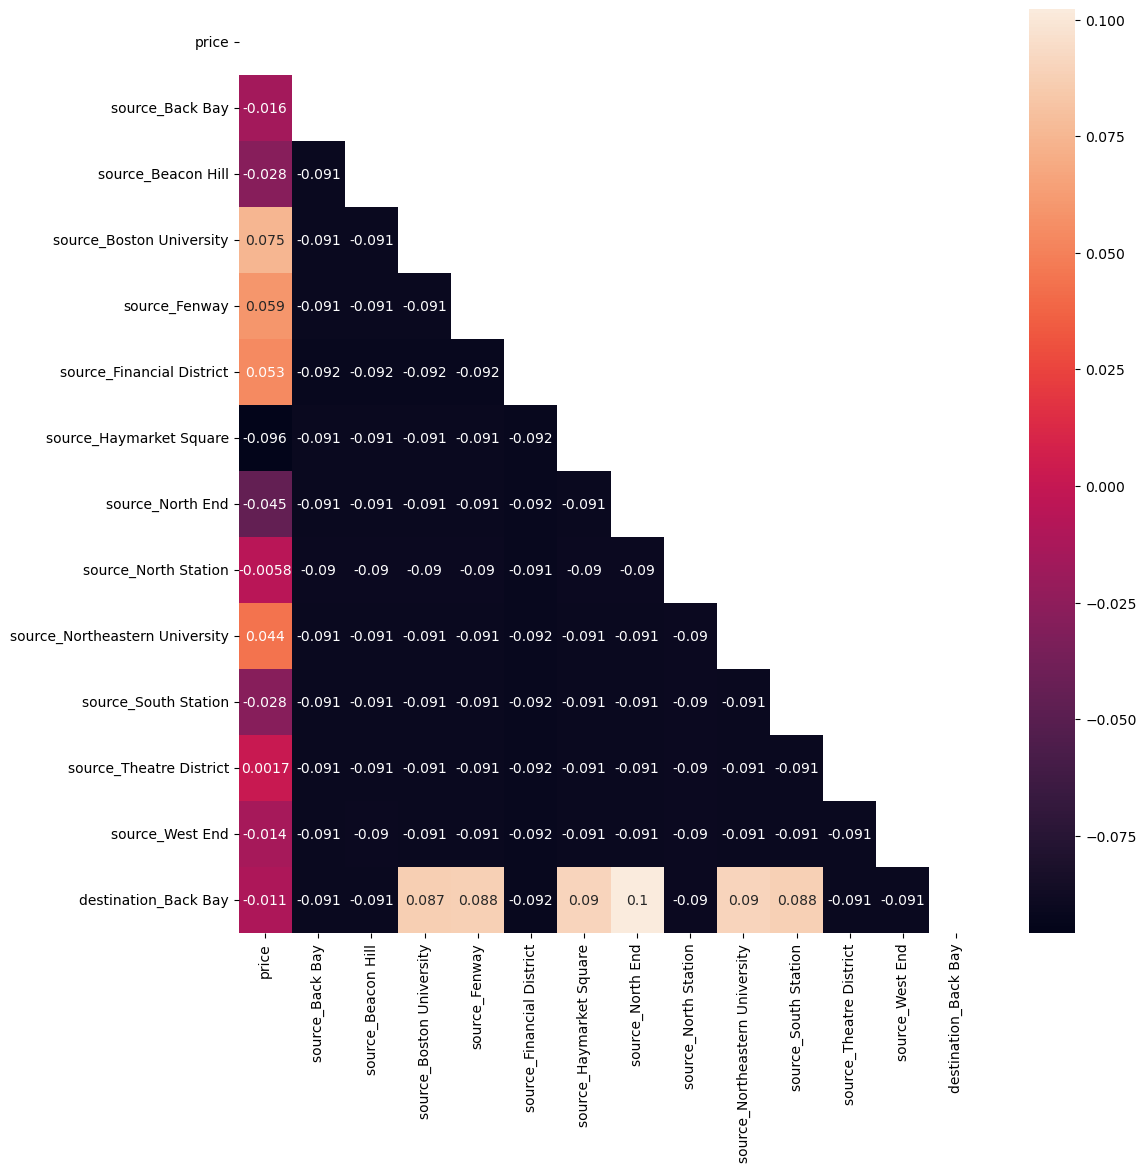

In [125]:
# membuat plot heatmap untuk melihat korelasi pada data_src
plt.figure(figsize=(12,12))
sns.heatmap(df_src.corr(),annot=True, mask=np.triu(df_src.corr()))

Dapat dilihat bahwa variabel-variabel diatas memiliki korelasi yang mendekati nol, artinya varibel tidak cukup berpengaruh terhadap target. Dengan kondisi demikian, maka kolomnya dapat dihapus.

In [126]:
src_cols = ['source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End']
df = df.drop(src_cols,axis=1)

In [127]:
# membuat dataframe dengan variabel price dan destination
dst_col = ['price','destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']
df_dst = df[dst_col]
df_src.head()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

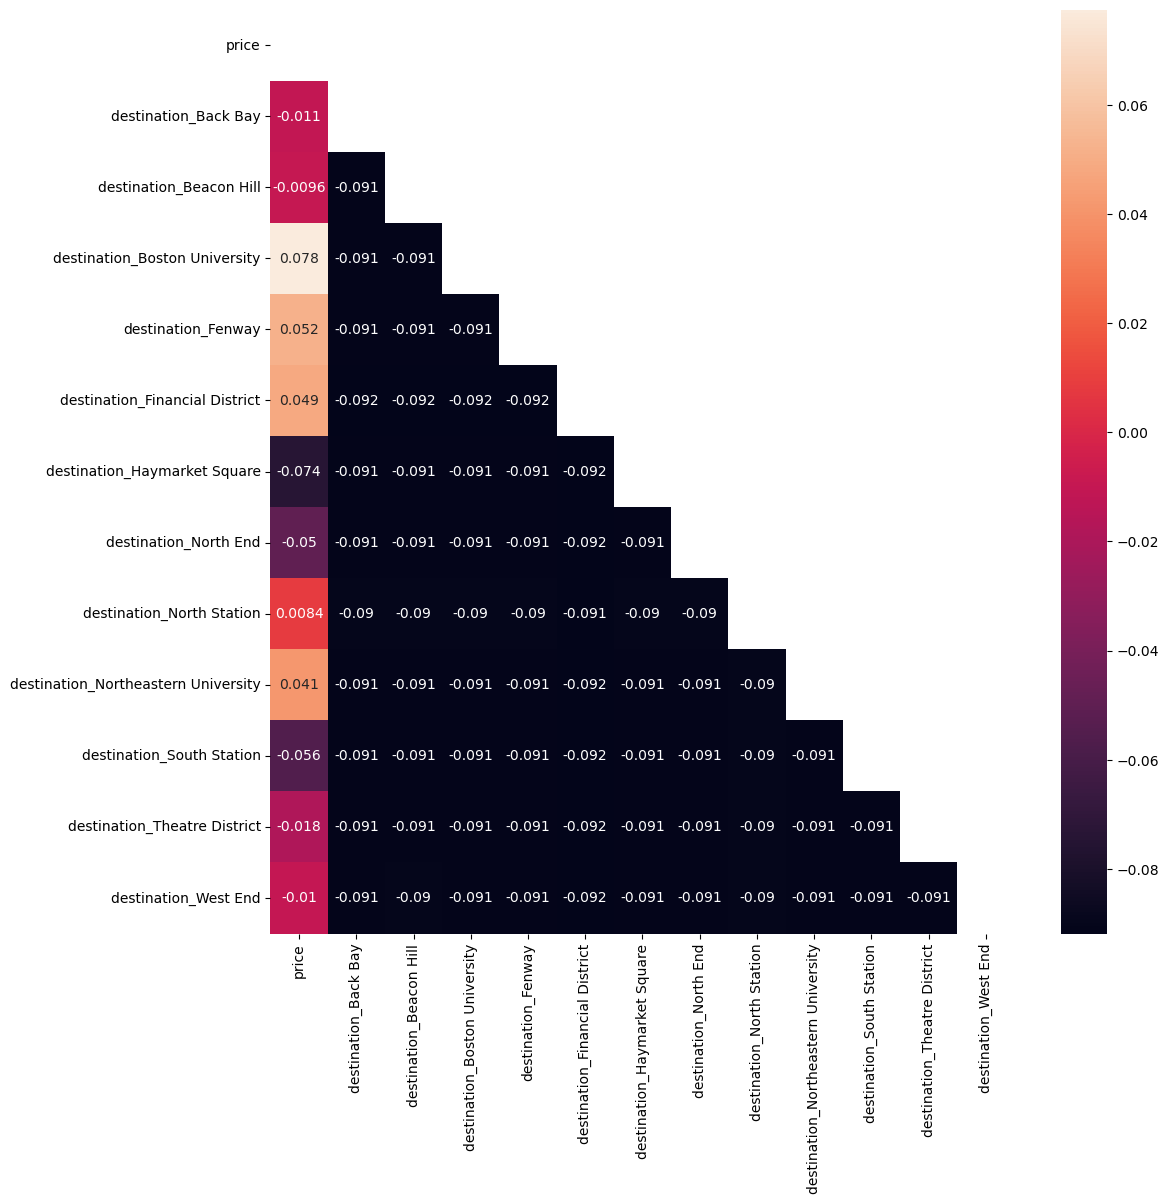

In [128]:
# membuat plot heatmap untuk melihat korelasi pada data_dst
plt.figure(figsize=(12,12))
sns.heatmap(df_dst.corr(),annot=True, mask=np.triu(df_dst.corr()))

Dapat dilihat bahwa variabel-variabel diatas memiliki korelasi yang mendekati nol, artinya varibel tidak cukup berpengaruh terhadap target. Dengan kondisi demikian, maka kolomnya dapat dihapus.

In [129]:
# drop source dan destination column value
dst_cols = ['destination_Back Bay','destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']
df = df.drop(dst_cols,axis=1)

In [130]:
# membuat dataframe dengan variabel price dan summary
summ_cols = ['price','short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ','short_summary_ Clear ']
df_summ = df[summ_cols]
df_summ.head()

,price,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,short_summary_ Clear
0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<AxesSubplot:>

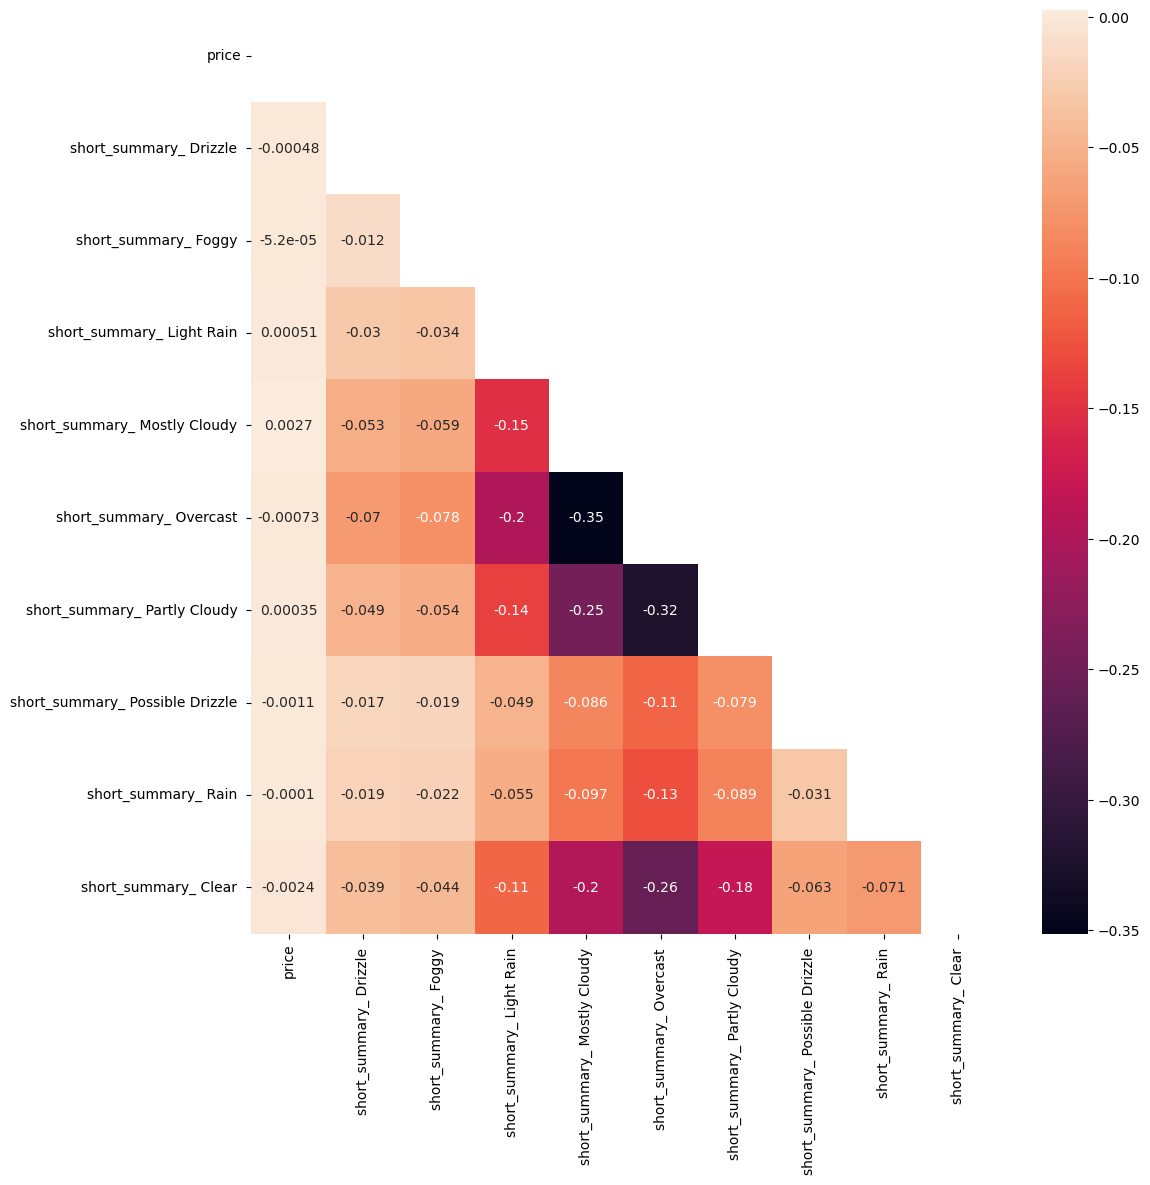

In [131]:
#membuat plot heatmap untuk melihat korelasi pada data_summ
plt.figure(figsize=(12,12))
sns.heatmap(df_summ.corr(),annot=True, mask=np.triu(df_summ.corr()))

Dapat dilihat bahwa variabel-variabel diatas memiliki korelasi yang mendekati nol, artinya varibel tidak cukup berpengaruh terhadap target. Dengan kondisi demikian, maka kolomnya dapat dihapus.

In [132]:
# drop data column summary
summ_cols = ['short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ','short_summary_ Clear ']
df = df.drop(summ_cols,axis=1)

In [133]:
# membuat dataframe dengan variabel price dan icon
ico_cols = ['price','icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ',
       'icon_ rain ']
df_ico = df[ico_cols]
df_ico.head()

,price,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

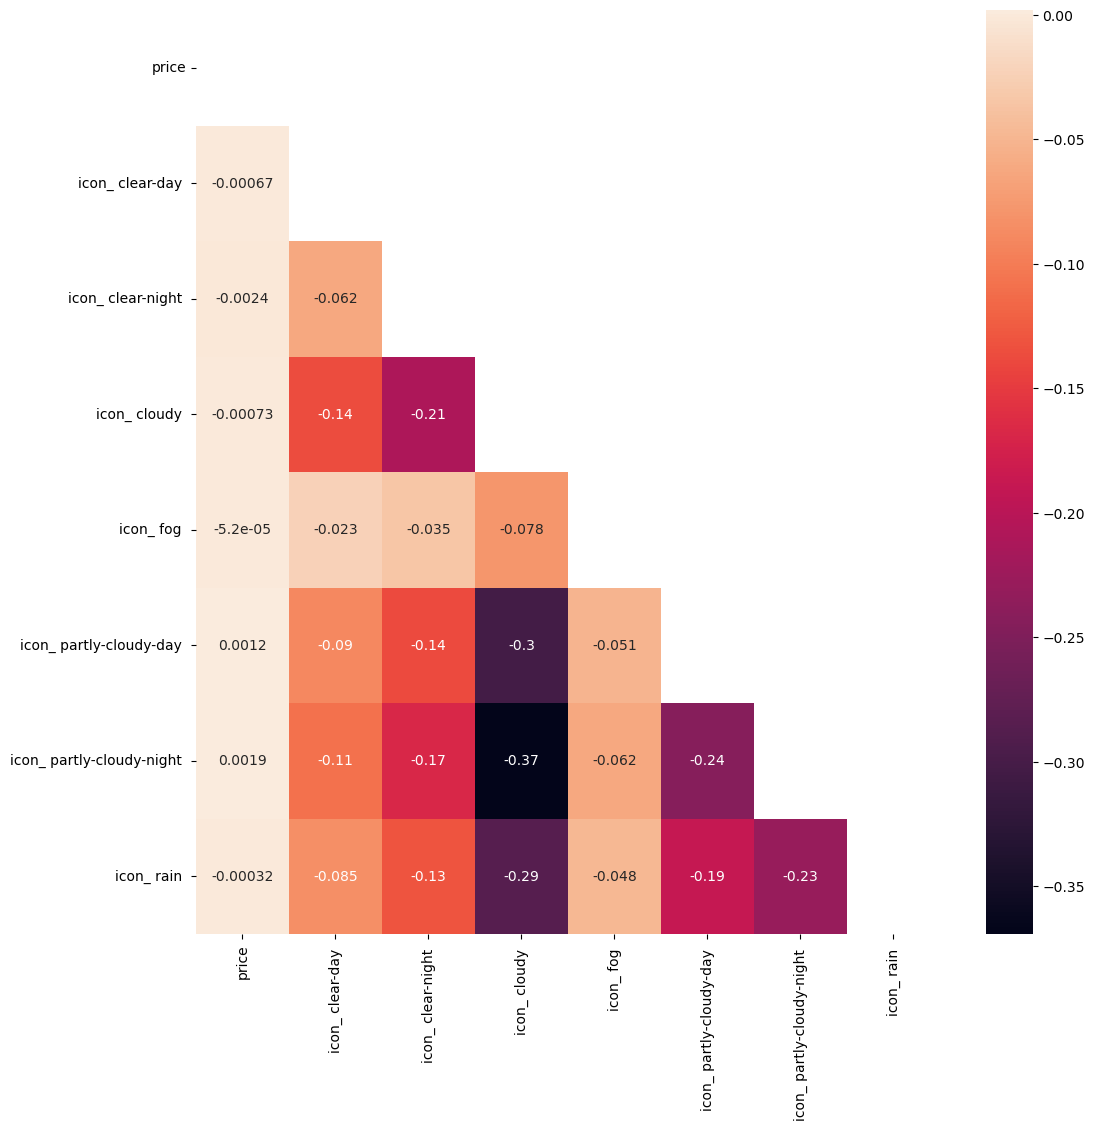

In [134]:
# membuat plot heatmap untuk melihat korelasi pada data_ico
plt.figure(figsize=(12,12))
sns.heatmap(df_ico.corr(),annot=True, mask=np.triu(df_ico.corr()))

Dapat dilihat bahwa variabel-variabel diatas memiliki korelasi yang mendekati nol, artinya varibel tidak cukup berpengaruh terhadap target. Dengan kondisi demikian, maka kolomnya dapat dihapus.

In [135]:
# drop data column icon
ico_cols = ['icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ',
       'icon_ rain ']
df = df.drop(ico_cols,axis=1)

In [136]:
# membuat dataframe dengan variabel price dan name
name_cols = ['price','name_Black', 'name_Black SUV',
       'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_Lyft XL', 'name_Shared',  'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV']
df_name = df[name_cols]
df_name.head()

,price,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

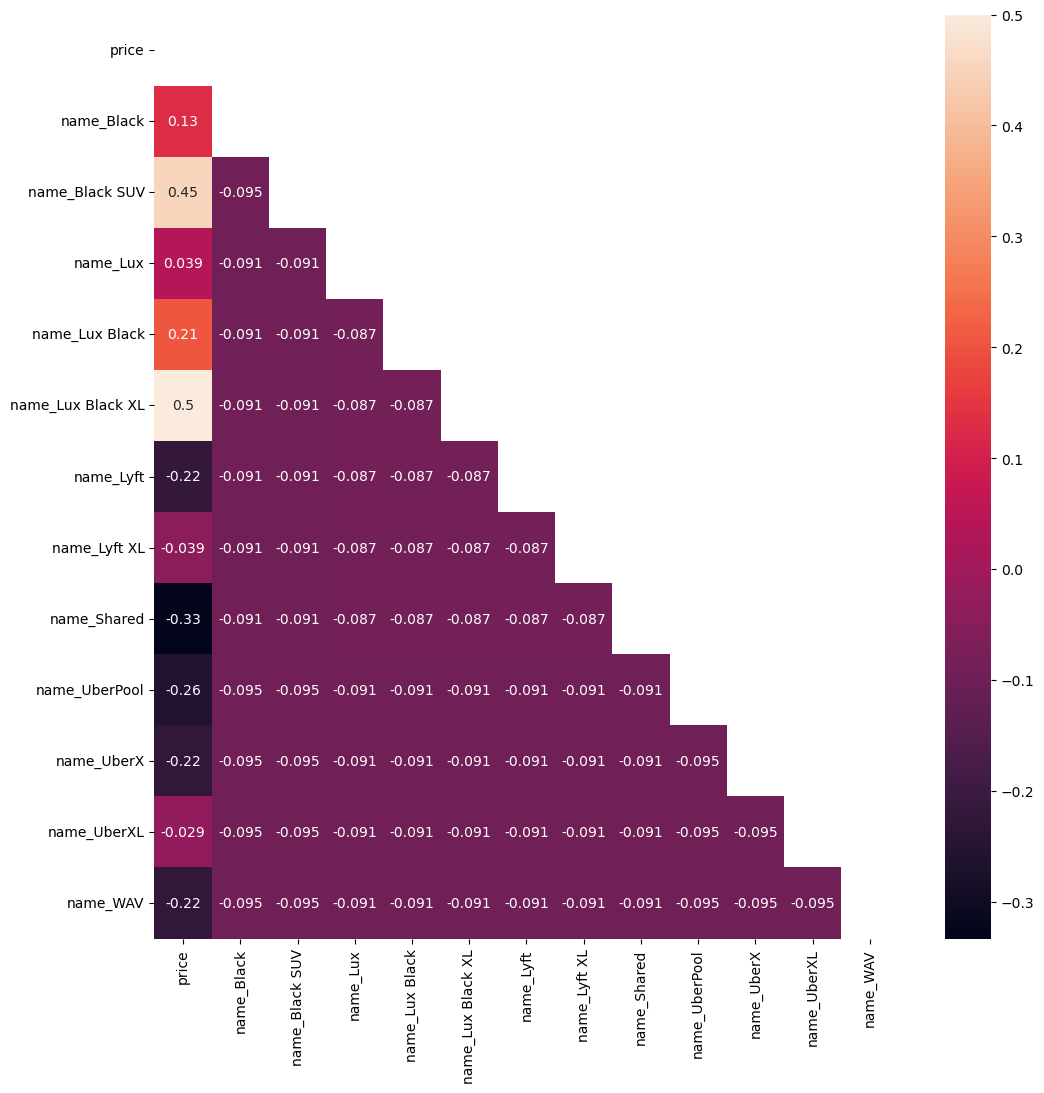

In [137]:
# membuat plot heatmap untuk melihat korelasi pada data_name
plt.figure(figsize=(12,12))
sns.heatmap(df_name.corr(),annot=True, mask=np.triu(df_name.corr()))

Beberapa kolom cukup berkorelasi, maka akan kita pertahankan.

In [138]:
# membuat dataframe dengan variabel price dan variabel lainnya yang tersisa
rem_cols =['price','hour', 'day', 'month', 'distance', 'surge_multiplier','cab_type_Lyft','cab_type_Uber']
df_rem = df[rem_cols]
df_rem.head()

,price,hour,day,month,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber
0,5.0,9,16,12,0.44,1.0,1.0,0.0
1,11.0,2,27,11,0.44,1.0,1.0,0.0
2,7.0,1,28,11,0.44,1.0,1.0,0.0
3,26.0,4,30,11,0.44,1.0,1.0,0.0
4,9.0,3,29,11,0.44,1.0,1.0,0.0


<AxesSubplot:>

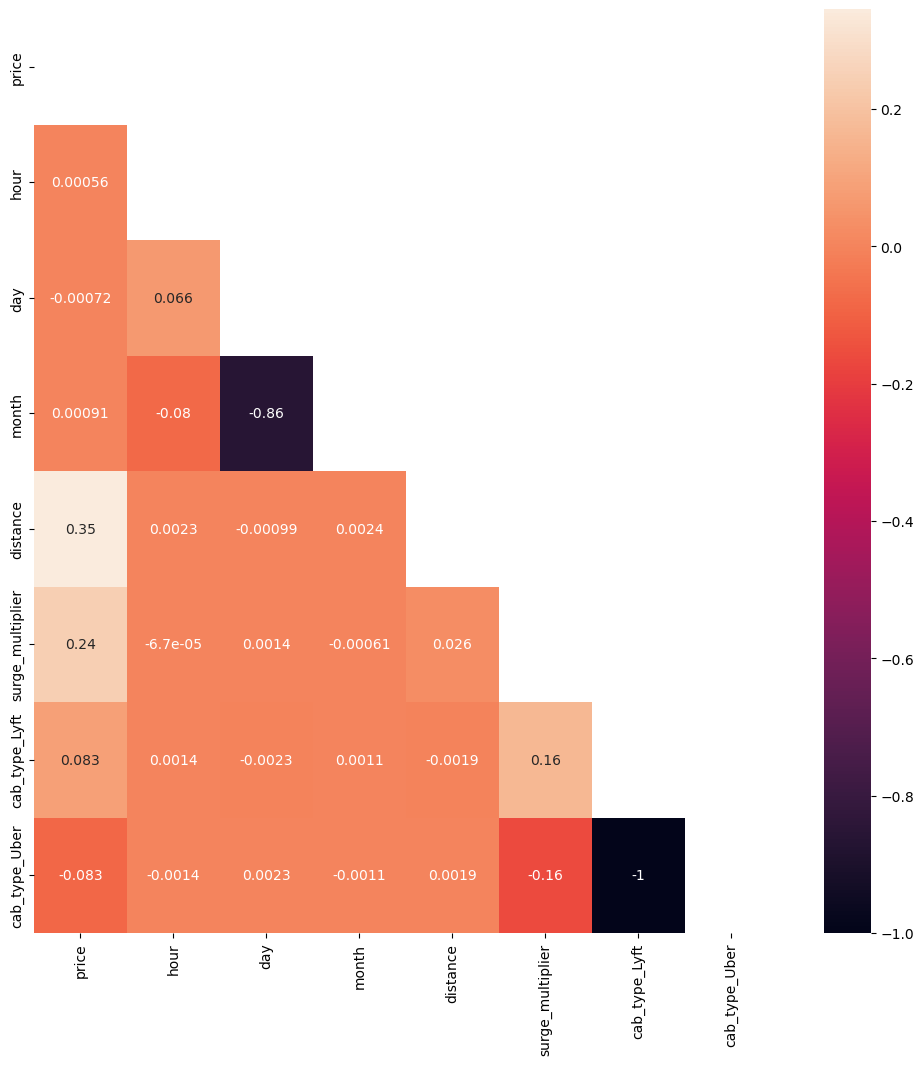

In [139]:
# membuat plot heatmap untuk melihat korelasi pada data_rem
plt.figure(figsize=(12,12))
sns.heatmap(df_rem.corr(),annot=True, mask=np.triu(df_rem.corr()))

Dari plot di atas dapat dilihat bahwa variabel yang cukup memiliki korelasi dengan variabel price yaitu **surge_multiplier** dan **distance** dengan nilai korelasi 0.24 dan 0.35, sedangkan variabel lainnya tidak memiliki korelasi atau memiliki korelasi yang lemah dengan variabel price karena nilai korelasinya negatif ataupun hampir 0 sehingga variabel lainnya dapat dihapus.

In [140]:
df = df.drop(['month','day','hour','cab_type_Lyft','cab_type_Uber'],axis=1)
print(df.shape)
df.head()

(637974, 16)


,price,distance,surge_multiplier,temperature,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,42.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.44,1.0,43.58,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,1.0,38.33,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,1.0,34.38,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,1.0,37.44,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Cross Validation

Data akan dipecah menjadi 2 bagian, 80% sebagai data train dan 20% sebagai data test.

In [141]:
y = df['price'].values
X = df.drop(columns=['price'],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Modelling

### Liner Regression Model

#### Training Model

In [142]:
model = LinearRegression()
model = model.fit(X_train,y_train)

In [143]:
# model intercept
print('intercept:', model.intercept_)

intercept: -8.122657149041785


In [144]:
df_column = df.drop(['price'], axis=1)

In [145]:
# model slope
df_column = df.drop(['price'], axis=1)
coef_dict = {
    'features' : df_column.columns,
    'coef_value' : model.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,distance,2.795527
1,surge_multiplier,18.285484
2,temperature,0.000111
3,name_Black,4.236604
4,name_Black SUV,13.990806
5,name_Lux,0.804184
6,name_Lux Black,6.111292
7,name_Lux Black XL,15.376499
8,name_Lyft,-7.371894
9,name_Lyft XL,-1.673498


#### Model Evaluation

In [146]:
r_sq = model.score(X_train,y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9271708349387988


Nilai Adjusted R-Squared = 0.93 artinya 93% nilai price yang dapat dijelaskan oleh prediktor yang ada. Hal ini sudah sangat baik, artinya tahapan feature engineering sudah cukup baik.

In [147]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rootmeansq = np.sqrt(mse)
print(mse)
print(rootmeansq)

6.244844270263133
2.4989686413124783


Jika dilihat pada nilai RMSE nilai eror berada pada kisaran 2.5, hal ini masih cukup baik jika dibadingkan dengan rentang dari nilai price.

#### Perbaikan Model

Untuk memperbaiki model yang ada, mungkin salah satu cara yang harus dicoba adalah dengan mengeluarkan terlebih dahulu data leverage pada price.

In [148]:
df_no_outlier = df[df['price'] < 42.5]
y = df_no_outlier['price'].values
X = df_no_outlier.drop(columns=['price'],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [149]:
model = LinearRegression()
model = model.fit(X_train,y_train)

In [150]:
print('intercept:', model.intercept_)

intercept: -2.674222182644222


In [151]:
# model slope
df_column = df_no_outlier.drop(['price'], axis=1)
coef_dict = {
    'features' : df_column.columns,
    'coef_value' : model.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,distance,2.638677
1,surge_multiplier,13.140053
2,temperature,-0.000096
3,name_Black,4.258334
4,name_Black SUV,13.809985
5,name_Lux,0.998986
6,name_Lux Black,6.125748
7,name_Lux Black XL,14.604457
8,name_Lyft,-7.117923
9,name_Lyft XL,-1.438862


In [154]:
r_sq = model.score(X_train,y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9332707023975474


In [155]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rootmeansq = np.sqrt(mse)
print(mse)
print(rootmeansq)

4.943442470550594
2.223385362583507


Ternyata dengan membuang nilai leverage pada price dapat meningkatkan performa pada model. Maka pada kasus model regresi linear ini hasil akhirnya adalah **Adjusted R-Squared** yang didapatkan 0.9334 dan **RMSE** 2.224.

### Gradient Boosting Model

#### Training Model

In [156]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [157]:
metrics.r2_score(y_test,y_pred)

0.9335317946719983

In [158]:
y_pred = gb.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rootmeansq = np.sqrt(mse)
print(mse)
print(rootmeansq)

3.210587130342525
1.7918111313256553


Menggunakan model gradient boosting memiliki efek yang sangat baik, terutama dalam mengurangi nilai Eror. **RMSE** berhasil turun dari 2.22 menjadi 1.79. 

## Kesimpulan 

Pada kasus regresi kali ini, yakni menebak harga taksi uber dan lyft didapatkan model terbaik dengan menggunakan model **Gradient Boosting**. pada model ini didapatkan nilai Adjusted R-Squared sebesar 93.37 atau 93.37% nilai price yang dapat dijelaskan oleh prediktor yang ada, serta model ini menghasilkan nilai eror yang cukup kecil jika dibandingkan dengan model Linear Regression yang menghasilkan **RMSE** sebesar  2.224, sedangkan model **Gradient Boosting** hanya sebesar 1.79.